# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. 

Use this notebook to create your visualizations.

Below, we set up the dataframe with the Goodreads dataset for you. 

If you run this cell, you may get an error that some lines were skipped. Do not worry about that! 

For this studio, we want to focus on creating an effective visualization.

In [3]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to 
## get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", on_bad_lines='skip')

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years

df.describe()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [4]:
#Cleaning some of the data
df.columns = df.columns.str.strip()

With your dataframe set up, time to start creating visualizations!

### Viz #1

In [ ]:
#I want to see an example of a bubble chart! They look cute
# So i decided to find the publisher with the most published books. Then i want to see their books' average rating over all the years they've been publishing.
#  the third data point is the page count, that'll be the size of the bubbles!

#Find the publisher with the most published books
publisher_counts = df['publisher'].value_counts()

top_publisher = publisher_counts.idxmax()
num_books = publisher_counts.max()

print(f"Publisher with most books: {top_publisher} ({num_books} books)")


NameError: name 'df' is not defined

In [ ]:
#Vintage has 318 books published. Isolate that
publisher = "Vintage"
df_pub = df[df['publisher'] == publisher].copy()

df_pub.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
54,86,The Heidi Chronicles: Uncommon Women and Other...,Wendy Wasserstein,3.84,0679734996,9780679734994,eng,249,2766,64,7/2/1991,Vintage,1991
99,163,The Untouchable,John Banville,3.95,0679767479,9780679767473,eng,367,2163,216,6/30/1998,Vintage,1998
117,230,The Burnt Orange Heresy (Vintage Crime/Black L...,Charles Willeford,3.89,0679732527,9780679732525,eng,144,98,11,10/3/1990,Vintage,1990
172,408,The Names,Don DeLillo,3.64,0679722955,9780679722953,eng,339,3100,212,7/17/1989,Vintage,1989
185,423,Where I Was From,Joan Didion,3.86,0679752862,9780679752868,eng,240,2842,292,9/14/2004,Vintage,2004


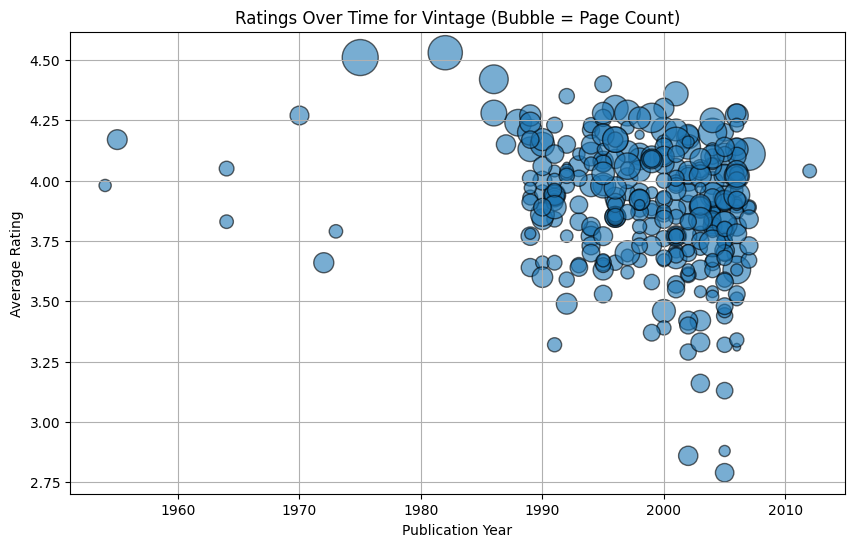

In [10]:

df_pub['publication_date'] = pd.to_datetime(df_pub['publication_date'], errors='coerce')
df_pub['year'] = df_pub['publication_date'].dt.year


plt.figure(figsize=(10, 6))

plt.scatter(
    df_pub['year'],
    df_pub['average_rating'],
    s=df_pub['num_pages'] * 0.5,  # scale bubble size
    alpha=0.6,
    edgecolor="k"
)

plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.title(f'Ratings Over Time for {publisher} (Bubble = Page Count)')
plt.grid(True)
plt.show()


### Viz #2

In [ ]:
#check for unique language codes and the top ones for amount of books
df['language_code'].unique()
df['language_code'].value_counts().head(5)

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
Name: count, dtype: int64

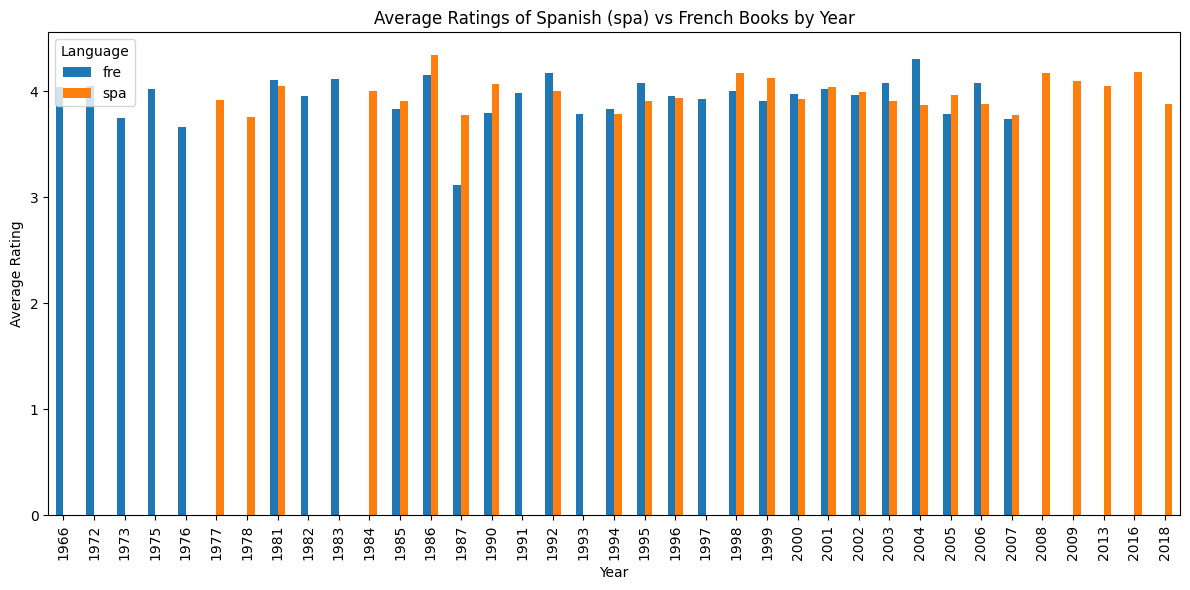

In [ ]:
#I want to compare the average rating of spanish vs french books over the years, i think i want to use a bar chart to do this
# Filter for Spanish and French books and use copy because i was getting a warning
filtered_books = df[df['language_code'].isin(['spa', 'fre'])].copy()

# Make sure 'year' is numeric
# Make sure x axis is in chronological order
filtered_books['year'] = pd.to_numeric(filtered_books['year'], errors='coerce')
avg_ratings = avg_ratings.sort_index()


# Group by year and language_code and calculate the average rating
# Unstack: Converts language_code into separate columns
avg_ratings = filtered_books.groupby(['year', 'language_code'])['average_rating'].mean().unstack()

# Plot
avg_ratings.plot(kind='bar', figsize=(12,6))
plt.title('Average Ratings of Spanish (spa) vs French Books by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Language')
plt.tight_layout()
plt.show()
